<a href="https://colab.research.google.com/github/NikBaybal/Forecasting_taxi_orders/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%B7%D0%B0%D0%BA%D0%B0%D0%B7%D0%BE%D0%B2_%D1%82%D0%B0%D0%BA%D1%81%D0%B8_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-вывод-данных" data-toc-modified-id="Загрузка-и-вывод-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и вывод данных</a></span></li><li><span><a href="#Ресемплирование-по-одному-часу" data-toc-modified-id="Ресемплирование-по-одному-часу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ресемплирование по одному часу</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создание признаков</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-обучающую-и-тестовую" data-toc-modified-id="Разделение-данных-на-обучающую-и-тестовую-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Разделение данных на обучающую и тестовую</a></span></li><li><span><a href="#Расчет-RMSE-разных-моделей-на-тестовой-выборке" data-toc-modified-id="Расчет-RMSE-разных-моделей-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет RMSE разных моделей на тестовой выборке</a></span><ul class="toc-item"><li><span><a href="#Модель-Dummy-Regression" data-toc-modified-id="Модель-Dummy-Regression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель Dummy Regression</a></span></li><li><span><a href="#Модель--DecisionTree" data-toc-modified-id="Модель--DecisionTree-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель  DecisionTree</a></span></li><li><span><a href="#Модель-Random-Forest" data-toc-modified-id="Модель-Random-Forest-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель Random Forest</a></span></li><li><span><a href="#Модель-Linear-Regression" data-toc-modified-id="Модель-Linear-Regression-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Модель Linear Regression</a></span></li><li><span><a href="#Модель-XGBoost" data-toc-modified-id="Модель-XGBoost-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Модель XGBoost</a></span></li></ul></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Предоставлены исторические данные о заказах такси в аэропортах.

Основная задача проекта — построить модель для задачи регрессии, прогнозирующую количество заказов такси на следующий час. Метрика *RMSE* модели на тестовой выборке должно быть не больше 48.

## Подготовка

### Загрузка и вывод данных

In [62]:
!pip install catboost

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import  DummyRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/YandexPraktikum/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df.sort_index(inplace=True)

In [66]:
def info_table(data):
    print('Исходная таблица:')
    display(data)
    print()
    print('Информация о таблице:')
    print(data.info())
    print()
    print('Статистические данные количественных значений:')
    print(data.describe())
    print()
    print('Количество пропущенных значений:')
    print(data.isnull().sum())

info_table(df)

Исходная таблица:


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27



Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None

Статистические данные количественных значений:
         num_orders
count  26496.000000
mean      14.070463
std        9.211330
min        0.000000
25%        8.000000
50%       13.000000
75%       19.000000
max      119.000000

Количество пропущенных значений:
num_orders    0
dtype: int64


### Ресемплирование по одному часу

In [67]:
df_hour = df.resample('1H').sum()
info_table(df_hour)

Исходная таблица:


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159



Информация о таблице:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None

Статистические данные количественных значений:
        num_orders
count  4416.000000
mean     84.422781
std      45.023853
min       0.000000
25%      54.000000
50%      78.000000
75%     107.000000
max     462.000000

Количество пропущенных значений:
num_orders    0
dtype: int64


### Создание признаков

In [68]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

In [69]:
make_features(df_hour, 1, 24)

In [70]:
df_hour

,num_orders,dayofweek,hour,lag_1,rolling_mean
datetime,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN
2018-03-01 02:00:00,71,3,2,85.0,NaN
2018-03-01 03:00:00,66,3,3,71.0,NaN
2018-03-01 04:00:00,43,3,4,66.0,NaN
...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,207.0,164.875000
2018-08-31 20:00:00,154,4,20,136.0,167.541667
2018-08-31 21:00:00,159,4,21,154.0,168.041667


## Анализ

<Axes: title={'center': 'Исторические данные количества заказов за несколько месяцев'}, xlabel='datetime'>

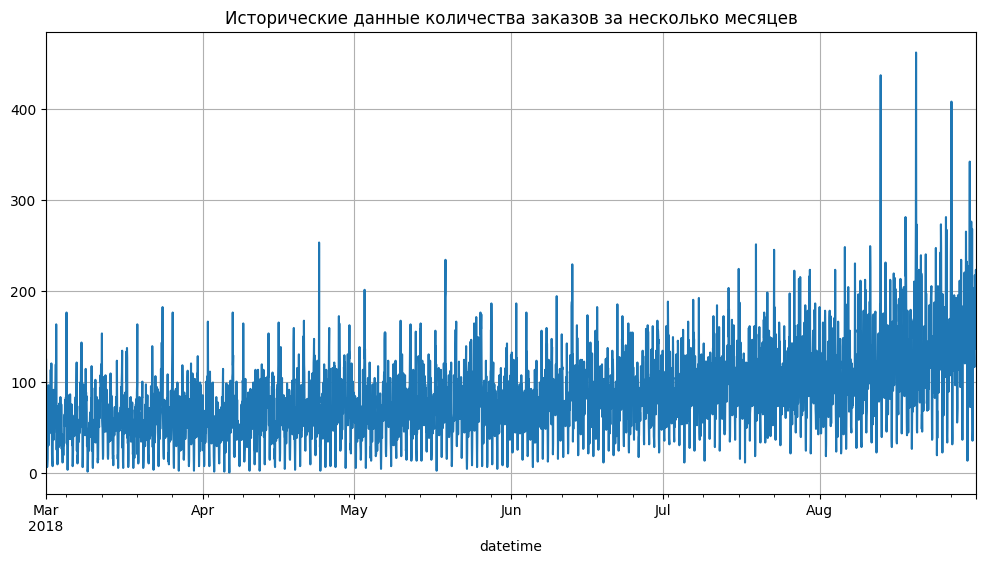

In [71]:
df_hour['num_orders'].plot(
    title='Исторические данные количества заказов за несколько месяцев',
    grid=True,
    figsize=(12, 6)
    )

<Axes: title={'center': 'Исторические данные количества заказов за неделю'}, xlabel='datetime'>

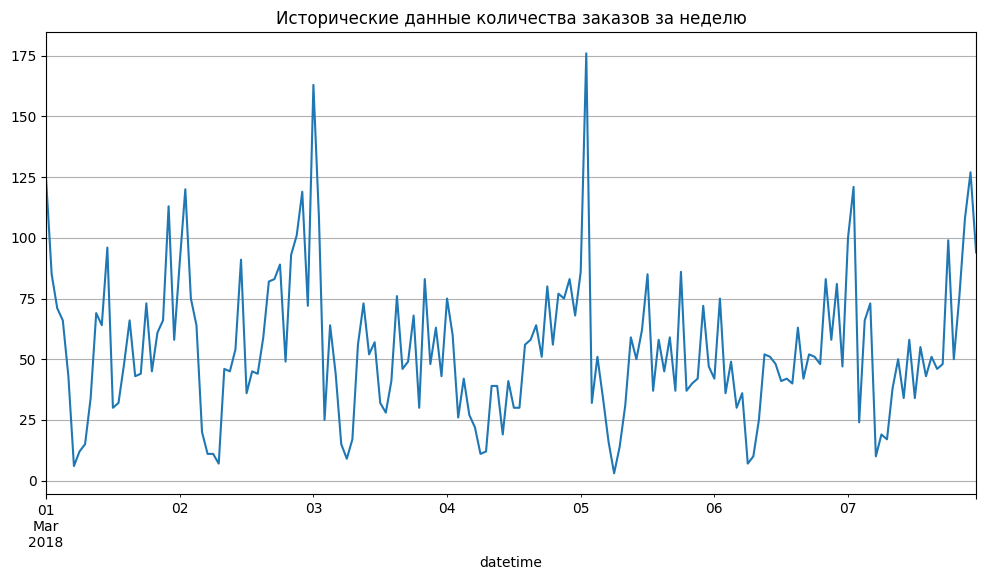

In [72]:
df_hour['num_orders'][:168].plot(
    title='Исторические данные количества заказов за неделю',
    grid=True,
    figsize=(12, 6),
    )

Исходя из графиков видно, что есть тренд на увеличение и сезонность в течение дня.

In [73]:
df_hour = df_hour.dropna()

<Axes: xlabel='datetime'>

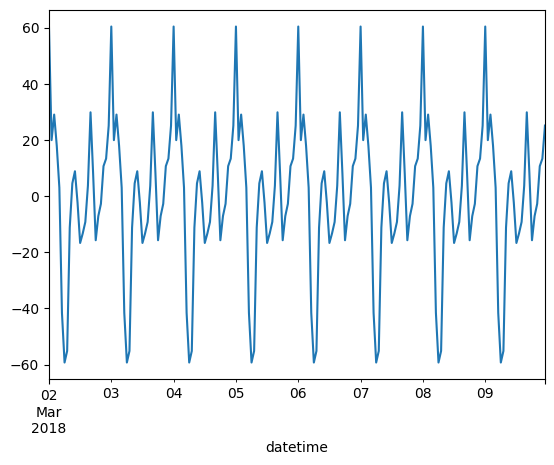

In [74]:
decomposed = seasonal_decompose(df_hour['num_orders'])
decomposed.seasonal['2018-03-02':'2018-03-09'].plot(ax=plt.gca())

<Axes: xlabel='datetime'>

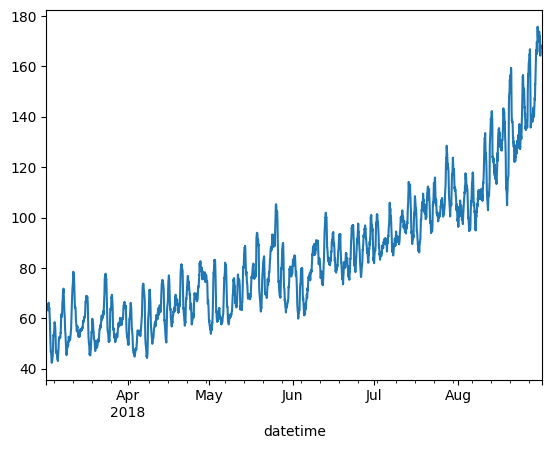

In [75]:
decomposed.trend.plot(ax=plt.gca())

Из вышеприведенных графиков, построенных методом декомпозиции видно, что в данном временном ряде есть только внутрисуточная сезонность и тренд на увеличение от месяца к месяцу.

## Обучение

### Разделение данных на обучающую и тестовую

In [76]:
X=df_hour.drop(['num_orders'], axis=1)
y=df_hour['num_orders']

In [77]:
X_train = X[:int(X.shape[0]*0.9)]
X_test = X[int(X.shape[0]*0.9):]
y_train = y[:int(X.shape[0]*0.9)]
y_test = y[int(X.shape[0]*0.9):]

### Расчет RMSE разных моделей на тестовой выборке

Создаем функцию для расчета RMSE для выбранной модели.

In [78]:
def RMSE(y_test,y_pred):
    return (mean_squared_error(y_test,y_pred)**0.5).round(1)

#### Модель Dummy Regression

In [79]:
dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(X_train,y_train)
dummy_pred = dummy_regressor.predict(X_test)
rmse_dummy = RMSE(y_test, dummy_pred)
print("RMSE модели DummyRegression на тестовой выборке:")
print(rmse_dummy)

RMSE модели DummyRegression на тестовой выборке:
84.7


#### Модель  DecisionTree

In [80]:
rmse_scorer=make_scorer(RMSE,greater_is_better=False)

In [81]:
model = DecisionTreeRegressor(random_state=12345)
parametrs = { 'max_depth': [4, 6, 10],
              'min_samples_leaf': [1, 6, 10],
              'min_samples_split': [2, 6, 10]
            }
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv,scoring=rmse_scorer)
grid.fit(X_train,y_train)
у_pred=grid.best_estimator_.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели DecisionTreeRegressor на тестовой выборке:")
print(rmse)
print("Значения гиперпараметров:")
print(grid.best_params_)

RMSE лучшей модели DecisionTreeRegressor на тестовой выборке:
47.8
Значения гиперпараметров:
{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


#### Модель Random Forest

In [82]:
model = RandomForestRegressor(n_estimators=50,random_state=12345)
parametrs = { 'max_depth': [4, 6, 10],
              'min_samples_leaf': [1, 6, 10],
              'min_samples_split': [2, 6, 10]
            }
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv,scoring=rmse_scorer)
grid.fit(X_train,y_train)
у_pred=grid.best_estimator_.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели RandomForestRegressor на тестовой выборке:")
print(rmse)
print("Значения гиперпараметров:")
print(grid.best_params_)

RMSE лучшей модели RandomForestRegressor на тестовой выборке:
45.7
Значения гиперпараметров:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


#### Модель Linear Regression

In [83]:
model = LinearRegression()
model.fit(X_train,y_train)
у_pred = model.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели Linear Regression на тестовой выборке:")
print(rmse)

RMSE лучшей модели Linear Regression на тестовой выборке:
51.2


#### Модель XGBoost

In [84]:
model = xgb.XGBRegressor(n_estimators=50,verbosity = 0)
parametrs = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10]}
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv,scoring=rmse_scorer)
grid.fit(X_train,y_train)
у_pred=grid.best_estimator_.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели XGBRegressor на тестовой выборке:")
print(rmse)
print("Значения гиперпараметров:")
print(grid.best_params_)

RMSE лучшей модели XGBRegressor на тестовой выборке:
49.5
Значения гиперпараметров:
{'depth': 4, 'learning_rate': 0.1}


### Модель CatBoost

In [85]:
model = CatBoostRegressor(iterations=50,verbose=False)
parametrs = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10]}
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv,scoring=rmse_scorer)
grid.fit(X_train,y_train)
у_pred=grid.best_estimator_.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели CatBoostRegressor на тестовой выборке:")
print(rmse)
print("Значения гиперпараметров:")
print(grid.best_params_)

RMSE лучшей модели CatBoostRegressor на тестовой выборке:
50.3
Значения гиперпараметров:
{'depth': 10, 'learning_rate': 0.1}


### Модель LightGBM

In [86]:
model = lgb.LGBMRegressor(n_estimators=50,verbosity =-1)
parametrs = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10]}
tscv = TimeSeriesSplit(n_splits=5)
grid = GridSearchCV(model, parametrs, cv=tscv,scoring=rmse_scorer)
grid.fit(X_train,y_train)
у_pred=grid.best_estimator_.predict(X_test)
rmse = RMSE(y_test, у_pred)
print("RMSE лучшей модели LGBMRegressor на тестовой выборке:")
print(rmse)
print("Значения гиперпараметров:")
print(grid.best_params_)

RMSE лучшей модели LGBMRegressor на тестовой выборке:
44.2
Значения гиперпараметров:
{'depth': 4, 'learning_rate': 0.1}


## Вывод

В первой части проекта была выполнена подготовка данных: загрузка и вывод данных, ресемплирование и создание признаков.

Во второй части были проанализированы данные.

В третьей части были обучены разные модели и рассчитаны RMSE на тестовой выборке.Ниже приведены результаты:

||Dummy Regression|Desicion Tree|Random Forest|Linear Regression|XGBoost|CatBoost|LGBoost|
|:-----|:----:|----:|----:|-----:|----:|----:|:----|
|Качество RMSE |84.7 |47.8 |45.7 |51.2|50.0 |48.5| 44.2|

Таким образом, для прогнозирования количества заказов такси на следующий час рекомендуется модель  LGBoost с качеством RMSE=44.2.

In [87]:
у_pred=pd.Series(у_pred,index=y_test.index)

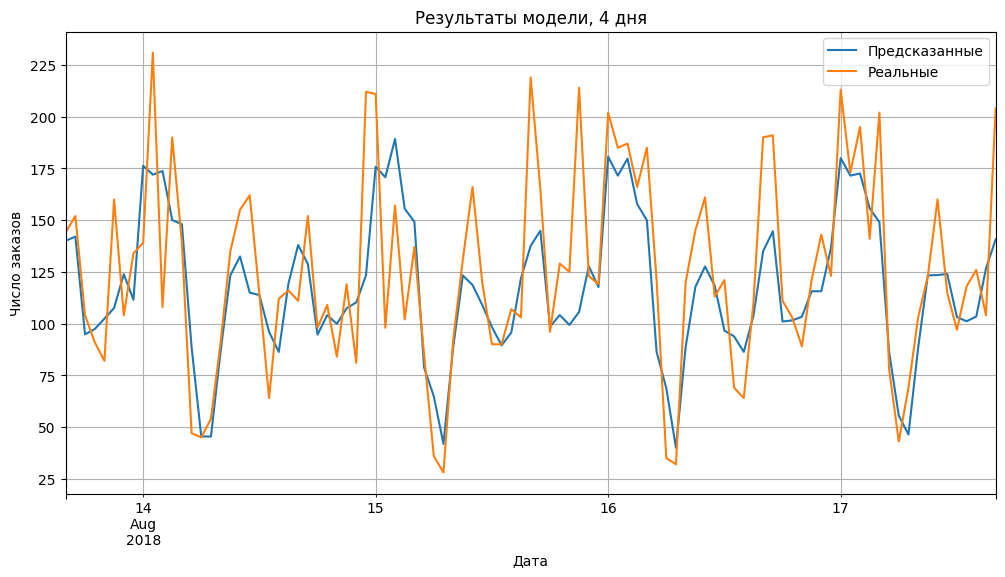

In [88]:
plt.figure(figsize=(12, 6))
у_pred[:97].plot()
y_test[:97].plot()
plt.title('Результаты модели, 4 дня')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.legend(['Предсказанные','Реальные'])
plt.grid( which='both')